#Fashin MNIST
Fashion Mnist는 옷, 바지 등 10가지 종류의 의류로 구성된 데이터입니다. 이 데이터는 (28, 28) 크기로 구성되어 있으며 Training Set 6만장, Test Set 1만장으로 총합 7만장으로 이루어져 있습니다. Keras에서 dataset을 import 할 수 있고, 처음 import 시 다운로드 하는 과정이 추가됩니다.

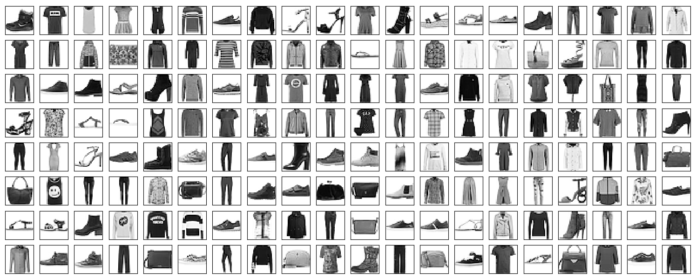


In [ ]:
from tensorflow.keras import datasets, layers, models, utils
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [ ]:
x_train=x_train.reshape(-1, 28, 28,1)
x_test=x_test.reshape(-1, 28, 28, 1)
x_train=x_train/255.0
x_test=x_test/255.0

#모델구성

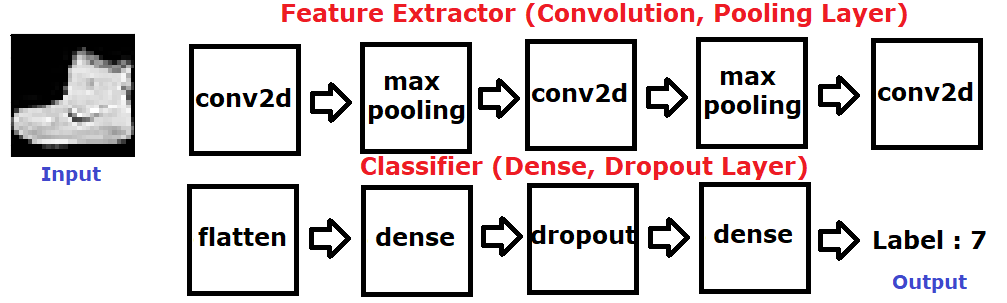

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), padding='same', activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2,2), strides=2))
model.add(layers.Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2,2), strides=2))
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               8

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics='accuracy' )
hitory=model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 36s 3ms/step - loss: 0.4094 - accuracy: 0.8504 - val_loss: 0.3144 - val_accuracy: 0.8845
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2634 - accuracy: 0.9040 - val_loss: 0.2676 - val_accuracy: 0.9022
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2184 - accuracy: 0.9196 - val_loss: 0.2364 - val_accuracy: 0.9161
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1828 - accuracy: 0.9326 - val_loss: 0.2544 - val_accuracy: 0.9075
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1564 - accuracy: 0.9421 - val_loss: 0.2236 - val_accuracy: 0.9206
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1306 - accuracy: 0.9508 - val_loss: 0.2428 - val_accuracy: 0.9199
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1029 - accuracy: 0.9617 - val_loss: 0.2648 - val_accuracy

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3513 - accuracy: 0.9137


[0.3513171076774597, 0.9136999845504761]

In [ ]:
def plot_history(history):
  plt.figure(figsize=(15, 5))

  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.legend(['train','val'])
  plt.title('Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.legend(['train','val'])
  plt.title('Cost')

  plt.show()

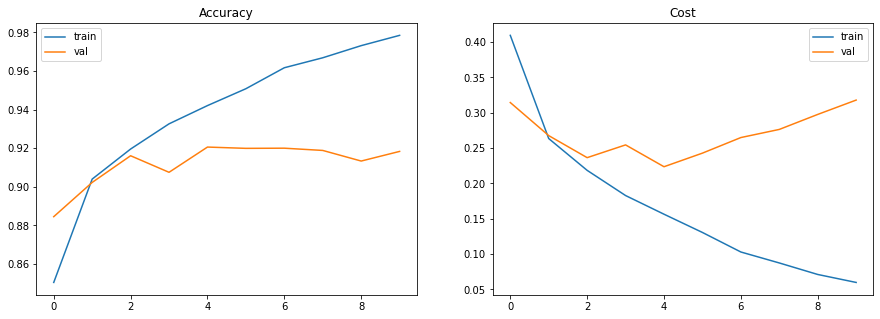

In [ ]:
plot_history(hitory)

In [ ]:
pred = model.predict(x_test[100:110])
print(pred)

[[5.00920702e-13 5.12438941e-13 5.62335380e-16 1.00000000e+00
  1.46450790e-15 3.77430238e-17 8.88267060e-09 1.71215725e-15
  2.62706320e-14 2.86118446e-14]
 [7.68615820e-08 7.25942950e-09 3.07773007e-06 5.35944423e-07
  1.40002940e-03 1.69167677e-07 9.98595536e-01 6.02601460e-07
  2.01019699e-08 3.06397396e-08]
 [1.07593420e-14 9.20895279e-16 7.61372042e-17 1.75955186e-16
  2.25593440e-15 1.15616355e-15 1.00923810e-18 1.00000000e+00
  1.80313663e-14 6.08751568e-15]
 [1.39704533e-03 3.75597971e-08 2.42059469e-01 1.32880832e-05
  2.94860492e-05 1.38977496e-08 7.56500363e-01 3.17458032e-10
  5.08241982e-09 2.61107857e-07]
 [1.65156907e-12 2.75752446e-12 9.09741466e-12 4.73301628e-13
  5.45390859e-12 3.40624447e-12 9.11316988e-15 1.00000000e+00
  1.56471234e-12 7.19610205e-11]
 [3.94282827e-12 6.52351466e-20 2.59846855e-14 1.47128200e-17
  1.33823466e-15 2.71111716e-14 2.66057277e-13 5.83335158e-15
  1.00000000e+00 2.09621921e-11]
 [3.78491479e-24 2.98585853e-30 3.32703763e-25 1.08667823e

In [ ]:
pred = np.argmax(pred, axis=1)

In [ ]:
items = {0:'T-shirt/top', 1:'Trouser', 2:'Pullover', 3:'Dress',
         4:'Coat', 5:'Sandal', 6:'Shirt', 7:'Sneaker', 
         8:'Bag', 9:'Ankel boot'}

In [ ]:
[items[i] for i in pred]

['Dress',
 'Shirt',
 'Sneaker',
 'Shirt',
 'Sneaker',
 'Bag',
 'Sandal',
 'Ankel boot',
 'Ankel boot',
 'Coat']

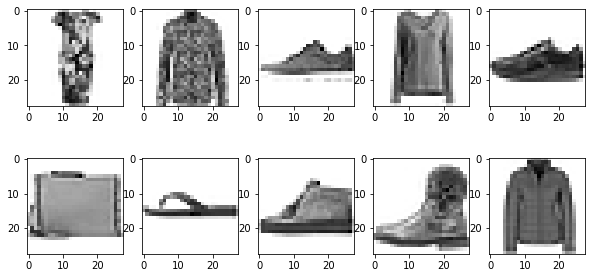

In [ ]:
x_test1 = x_test.reshape(-1, 28, 28)
fig, axs = plt.subplots(2, 5, figsize=(10,5))
for i in range(2):
  for j in range(5):
    axs[i, j].imshow(x_test1[i*5+j+100], cmap='gray_r')
plt.show()

#Drop out
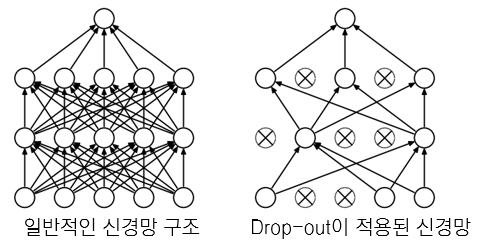

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), padding='same', activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2,2), strides=2))
model.add(layers.Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2,2), strides=2))
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics='accuracy' )
hitory=model.fit(x_train, y_train, epochs=10, validation_split=0.2)

In [ ]:
plot_history(hitory)

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3200 - accuracy: 0.9181


[0.3199564516544342, 0.9180999994277954]

#Callback

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), padding='same', activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2,2), strides=2))
model.add(layers.Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2,2), strides=2))
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', metrics='accuracy')

In [ ]:
cpcb=keras.callbacks.ModelCheckpoint('best.h5')
escb=keras.callbacks.EarlyStopping(patience=2, 
                                   restore_best_weights=True)
history=model.fit(x_train, y_train, epochs=50,
                  validation_split=0.2,
                  callbacks=[cpcb, escb])

In [ ]:
plot_history(history)

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2366 - accuracy: 0.9135


[0.23655222356319427, 0.9135000109672546]